## Data Science Project: Planning Stage (Individual)

In [1]:
library(tidyverse)
library(readr)
library(janitor)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ──────

## Players

In [2]:
players <- read_csv("players.csv", show_col_types = FALSE) |> clean_names() |> as_tibble()
players

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
players_rows <- nrow(players)
players_rows

[1] 196

In [4]:
players_cols <- ncol(players)
players_cols

[1] 7

In [5]:
played_hours_mean <- players |>
                     summarize(mean_played_hours = mean(played_hours, na.rm = TRUE))
played_hours_mean

mean_played_hours
<dbl>
5.845918


In [6]:
hours_mean_age <- players |>
                  group_by(age) |>
                  summarize(hours_mean_age = mean(played_hours, na.rm = TRUE))
hours_mean_age

age,hours_mean_age
<dbl>,<dbl>
8,0.3
9,30.3
10,3.6
⋮,⋮
49,18.50
50,0.00
NA,0.15


In [7]:
hours_mean_gender <- players |>
                     group_by(gender) |>
                     summarize(hours_mean_gender = mean(played_hours, na.rm = TRUE))
hours_mean_gender

gender,hours_mean_gender
<chr>,<dbl>
Agender,6.250000
Female,10.635135
Male,4.127419
⋮,⋮
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


In [8]:
age_mean <- players |>
            summarize(mean_age = mean(age, na.rm = TRUE))
age_mean

mean_age
<dbl>
20.52062


**Data Description for player**  
The number of observations is 196. The number of variables is 7.  
The average of `played_hours` is about 5.8 hours, and the average `age` is about 20.5 years old.
- Player experience level: `experience`, type: Character
- Subscription status: `subscribe`, type: Logical
- User email: `hashed_Email`, type: Character
- Player time (in hours): `played_hours`, type: Double
- Player name: `name`, type: Character
- Player gender: `gender`, type: Character
- Player age: `age`, type: Double

Issues:  
Missing values in age.  
`played_hours` may have extreme values, such as 30.3 and 0.

Data collection method  
The data may come from a game's user behavior record, either through a questionnaire or automated system collection.

## Sessions

In [9]:
sessions <- read_csv("sessions.csv", show_col_types = FALSE) |> as_tibble()
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [10]:
sessions_rows <- nrow(sessions)
sessions_rows

[1] 1535

In [11]:
sessions_cols <- ncol(sessions)
sessions_cols

[1] 5

**Data Description for sessions**  
The number of observations is 1535. The number of variables is 5.
- User email: `hashedEmail`, type: Character
- Session start time: `start_time`, type: Character
- Session end time: `end_time`, type: Character
- Original start time : `original_start_time`, type: Double
- Original end time: `original_end_time`, type: Double

Issues:  
Convert `original_start_time` and `original_end_time` to the date-time format(character).

In [12]:
separated_sessions <- sessions |>
                      select(-contains("original")) |>
                      separate(col = start_time, into = c("start_date", "start_time"), sep = "\ ") |>
                      separate(col = end_time, into = c("end_date", "end_time"), sep = "\ ")
separated_sessions

hashedEmail,start_date,start_time,end_date,end_time
<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15:36,28/07/2024,15:57
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06:15,25/07/2024,06:22
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02:26,20/05/2024,02:45


In [13]:
separated_sessions_rows <- nrow(separated_sessions)
separated_sessions_cols <- ncol(separated_sessions)
separated_sessions_rows
separated_sessions_cols

[1] 1535

[1] 5

## Question  
Broad question: Question 1  
Can experience, played_hours, gender, and age predict whether a player subscribes to the game-related newsletter in the dataset?

## Data Analysis and Visualization

In [14]:
players <- players |>
  mutate(age = as.numeric(age),
         played_hours = as.numeric(played_hours),
         experience = as.factor(experience),
         gender = as.factor(gender),
         subscribe = as.factor(subscribe))

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


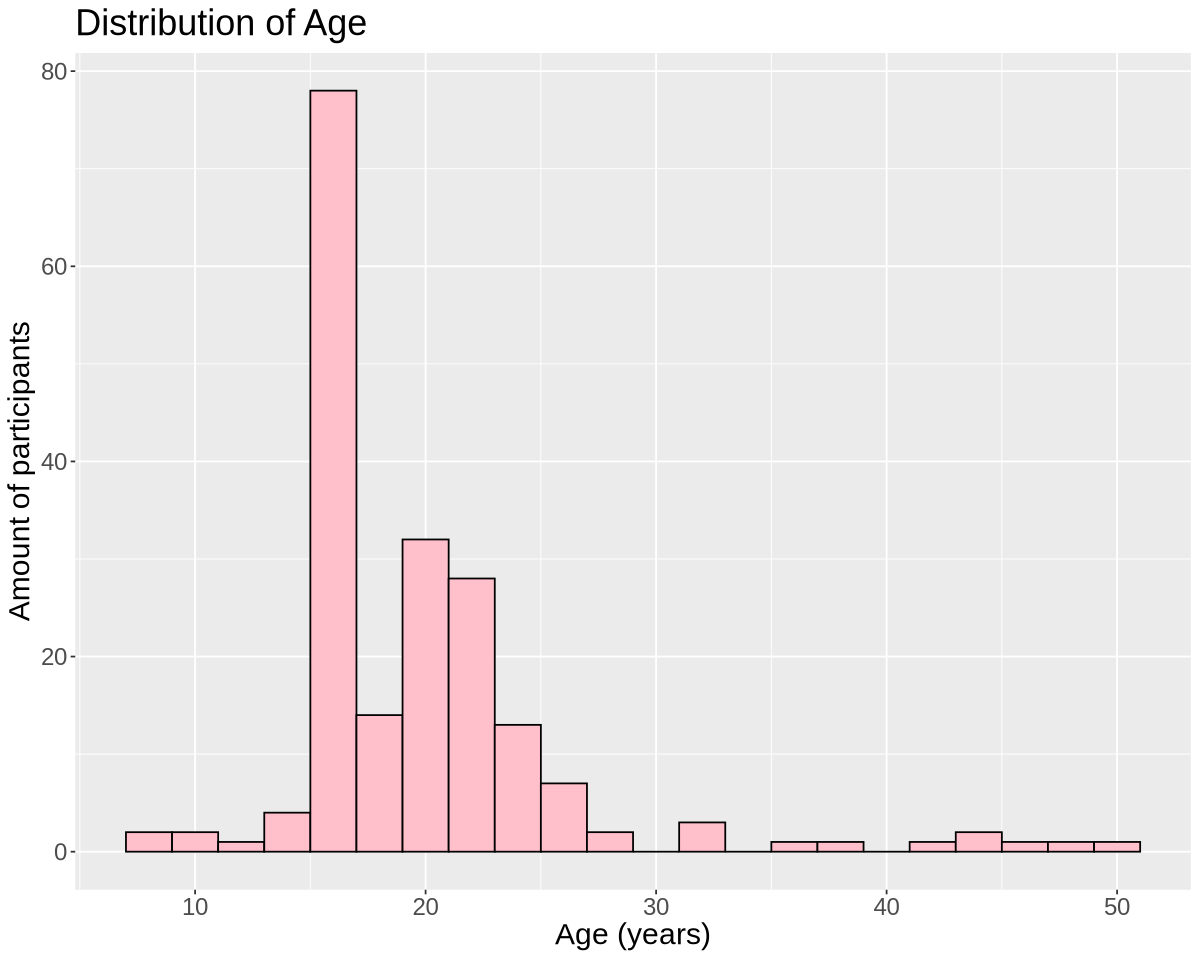

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_plot <- ggplot(players, aes(x = age)) +
  geom_histogram(binwidth = 2, fill = "pink", color = "black") +
  labs(title = "Distribution of Age",
       x = "Age (years)",
       y = "Amount of participants") +
       theme(text = element_text(size = 18))
age_plot

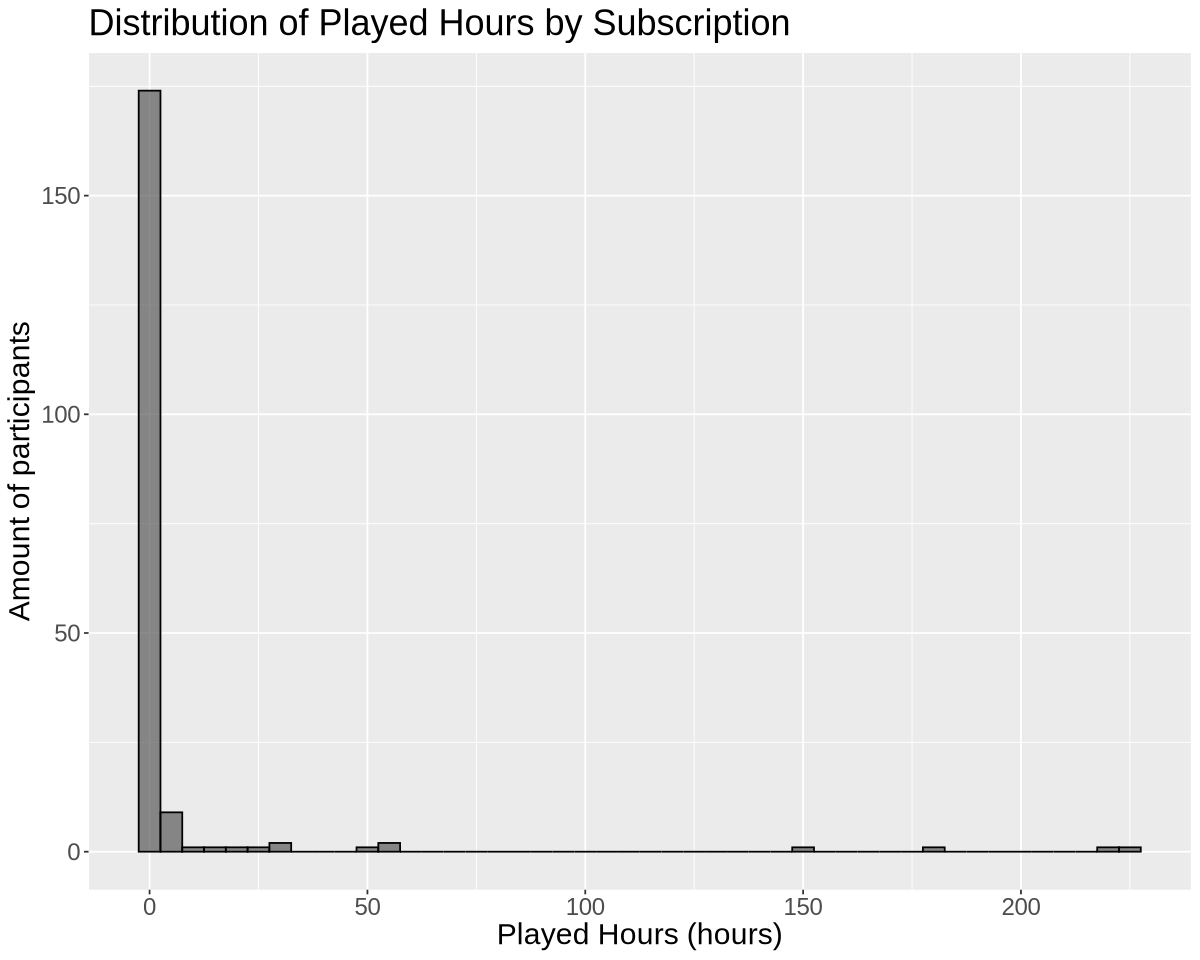

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)
played_hours_plot <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, color = "black", alpha = 0.7, position = "identity") +
  labs(title = "Distribution of Played Hours by Subscription",
       x = "Played Hours (hours)",
       y = "Amount of participants") +
       theme(text = element_text(size = 18))
played_hours_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


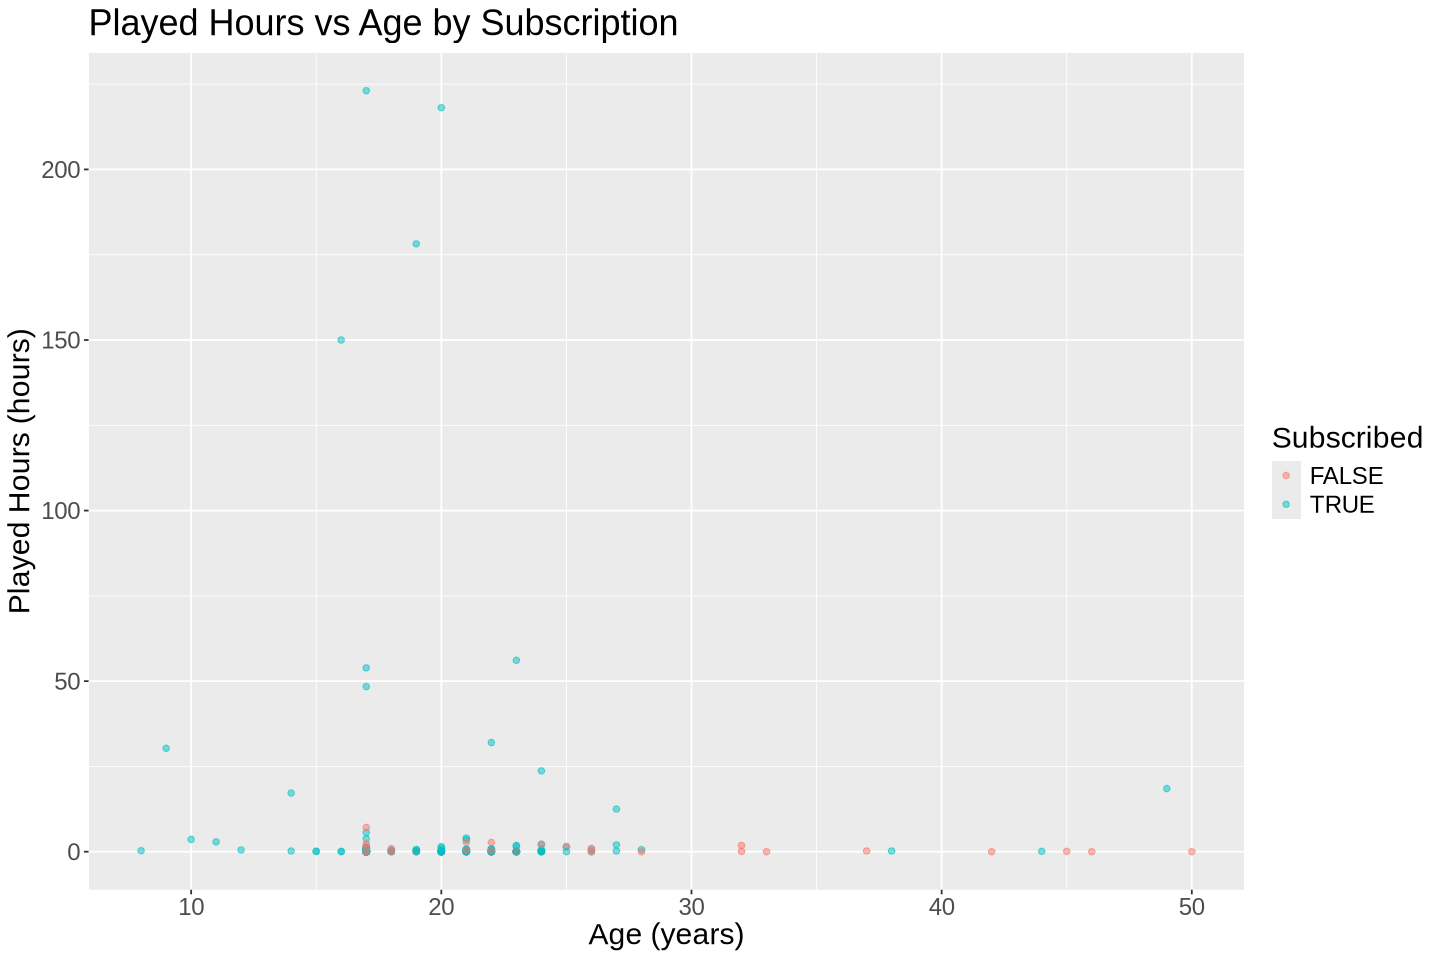

In [17]:
options(repr.plot.width = 12, repr.plot.height = 8)
hours_age <- ggplot(players, aes(x = age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.5) +
  labs(title = "Played Hours vs Age by Subscription",
       x = "Age (years)",
       y = "Played Hours (hours)",
       color = "Subscribed") +
       theme(text = element_text(size = 18))
hours_age

The graphs illustrate that there is no relationship between `played_hours` and `age`. Most participants are 15-25 years old, and participants' `played_hours` is generally under 1 hour. Subscribing players are mainly aged 10-30, also within 1 hour of gameplay.

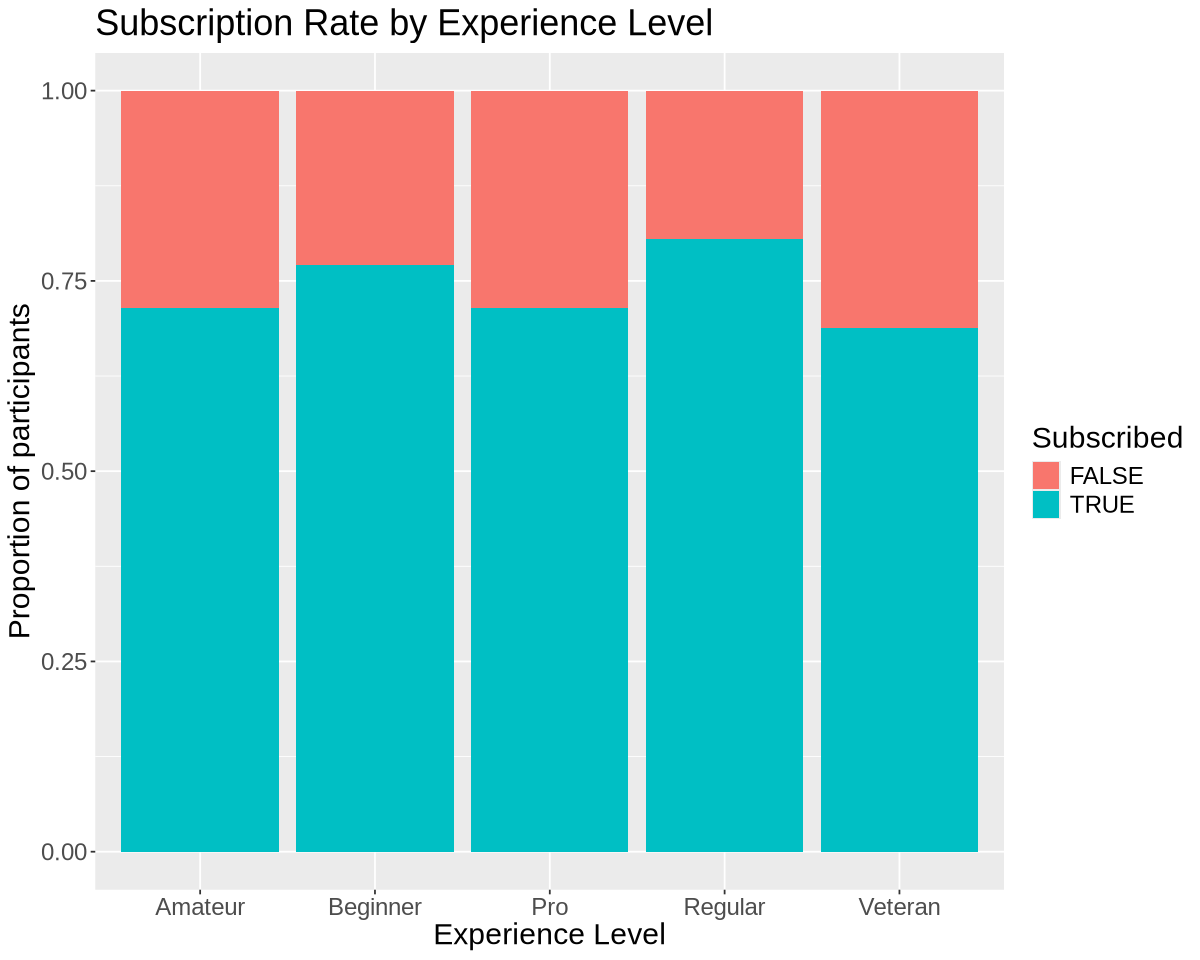

In [18]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot_experience <- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion of participants",
       fill = "Subscribed") +
       theme(text = element_text(size = 18))
plot_experience

This graph shows similar subscription rates across experience levels, suggesting `experience` is not a key predictor.

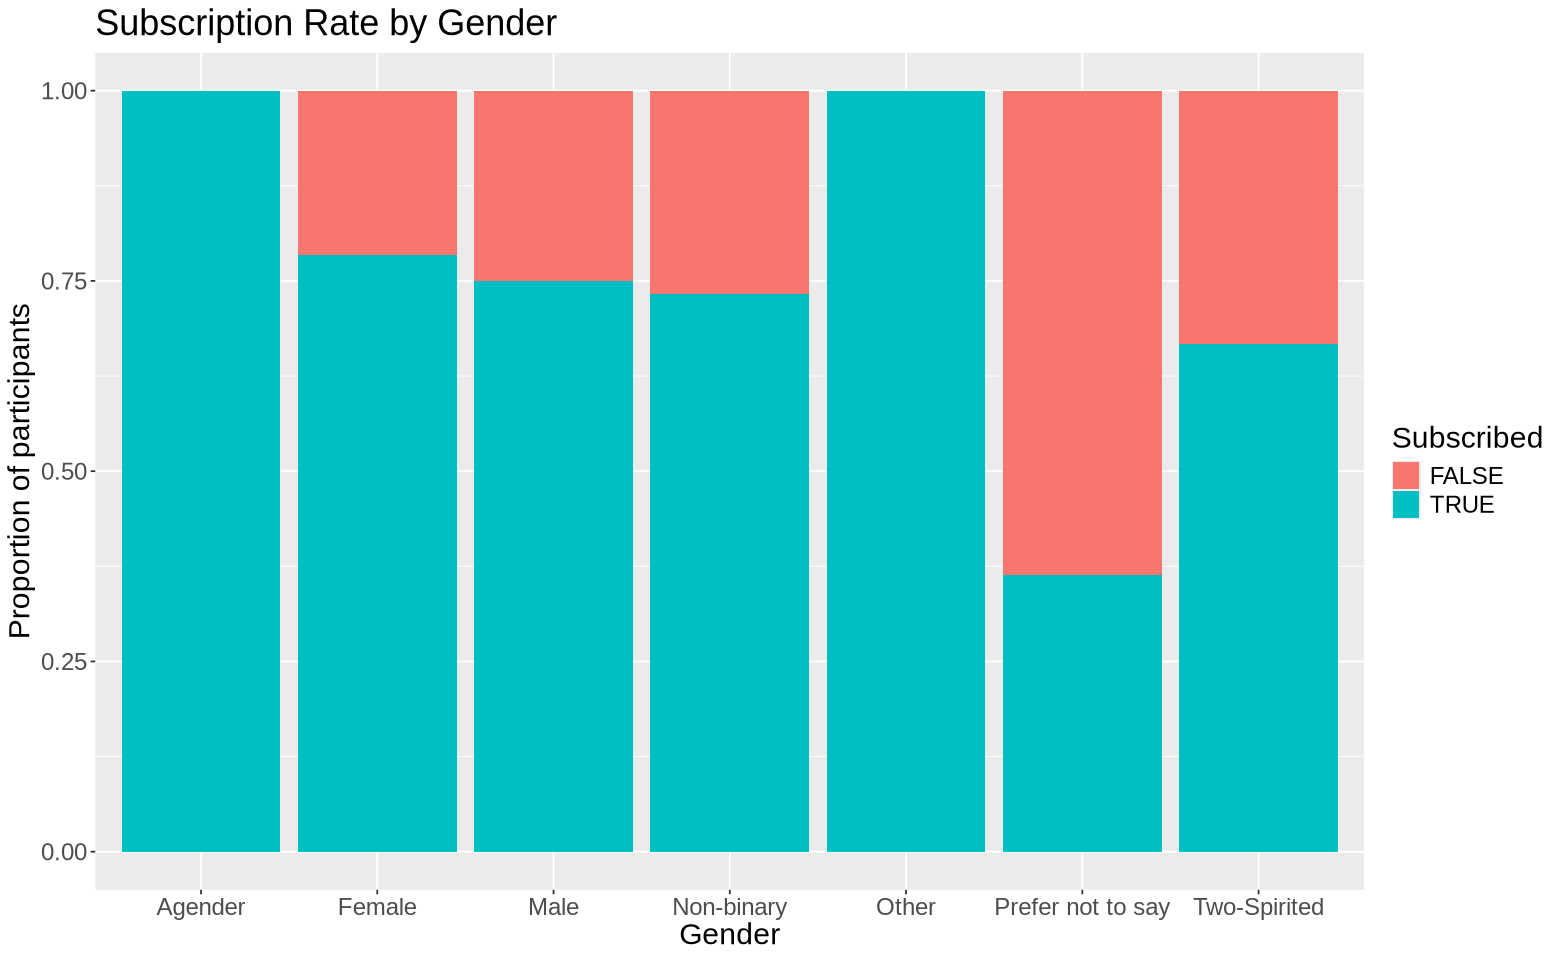

In [19]:
options(repr.plot.width = 13, repr.plot.height = 8)
gender_plot <- ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "fill") +  
  labs(title = "Subscription Rate by Gender",
       x = "Gender",
       y = "Proportion of participants",
       fill = "Subscribed") +
       theme(text = element_text(size = 18))
gender_plot

This graph shows subscription differences by `gender`. All `Agender` and `Other` participants subscribe, while the `Prefer not to say` group has the lowest rate, indicating `gender` influences subscriptions.

## Methods and Plan  
Why is this method appropriate?  
I chose to use K-Nearest Neighbors (KNN) Classification to address my question. The reason is that my goal is to predict whether a player subscribes to the game-related newsletter, which is a binary classification problem. KNN is simple, intuitive, and classifies new players based on similarity to observed players using distance metrics like Euclidean distance.  

Which assumptions are required, if any, to apply the method selected?  
The dataset is balanced. The predictor variables should be properly standardized and scaled.  

What are the potential limitations or weaknesses of the method selected?  
KNN is sensitive to data distribution and category imbalance, which can reduce accuracy. Since it uses Euclidean distance, variables with larger scales may have more influence, potentially biasing classification.  

How are you going to compare and select the model?  
I will use cross-validation on the training data to select the best value for K and also evaluate classification accuracy, precision, and recall.  

How are you going to process the data to apply the model?  
Cleaned up the data. The variables `experience` and `gender` are in character format and `subscribe` is in logical format. They can be replaced with numeric values.  
Also, handled missing values and standardized variables for comparability.  
Split the data into a training set (75%) and a testing set (25%).  
Use 5-fold cross-validation on the training set to select the best K.  
The final model will be evaluated using the testing set.  
The evaluation metric will be classification accuracy, precision, and recall.